In [ ]:
import numpy as np 
import pandas as pd 

import cv2
import os
from xml.etree import ElementTree
from matplotlib import pyplot as plt

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
keras = tf.keras
import numpy as np 
import pandas as pd 


In [ ]:

class_names = ['person', 'person-like']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
n_classes = 2
size = (200, 200)

In [ ]:
def load_data():
    datasets = ['Train/Train', 'Test/Test', 'Val/Val']
    output = []

    for dataset in datasets:
        imags = []
        labels = []
        directoryA = "C:/Users/PRIYANKA/Desktop/New folder/" + dataset +"/Annotations"
        directoryIMG = "C:/Users/PRIYANKA/Desktop/New folder/" + dataset +"/JPEGImages/"
        file = os.listdir(directoryA)
        img = os.listdir(directoryIMG)
        file.sort()
        img.sort()

        i = 0
        for xml in file:

            xmlf = os.path.join(directoryA,xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])

            img_path = directoryIMG + img[i]
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            imags.append(curr_img)
            i +=1
        
        imags = np.array(imags, dtype='float32')
        imags = imags / 255
        
        labels = np.array(labels, dtype='int32')

        output.append((imags, labels))
    return output

In [51]:
(train_images, train_labels),(test_images, test_labels),(val_images, val_labels) = load_data()
train_images.shape

(944, 200, 200, 3)

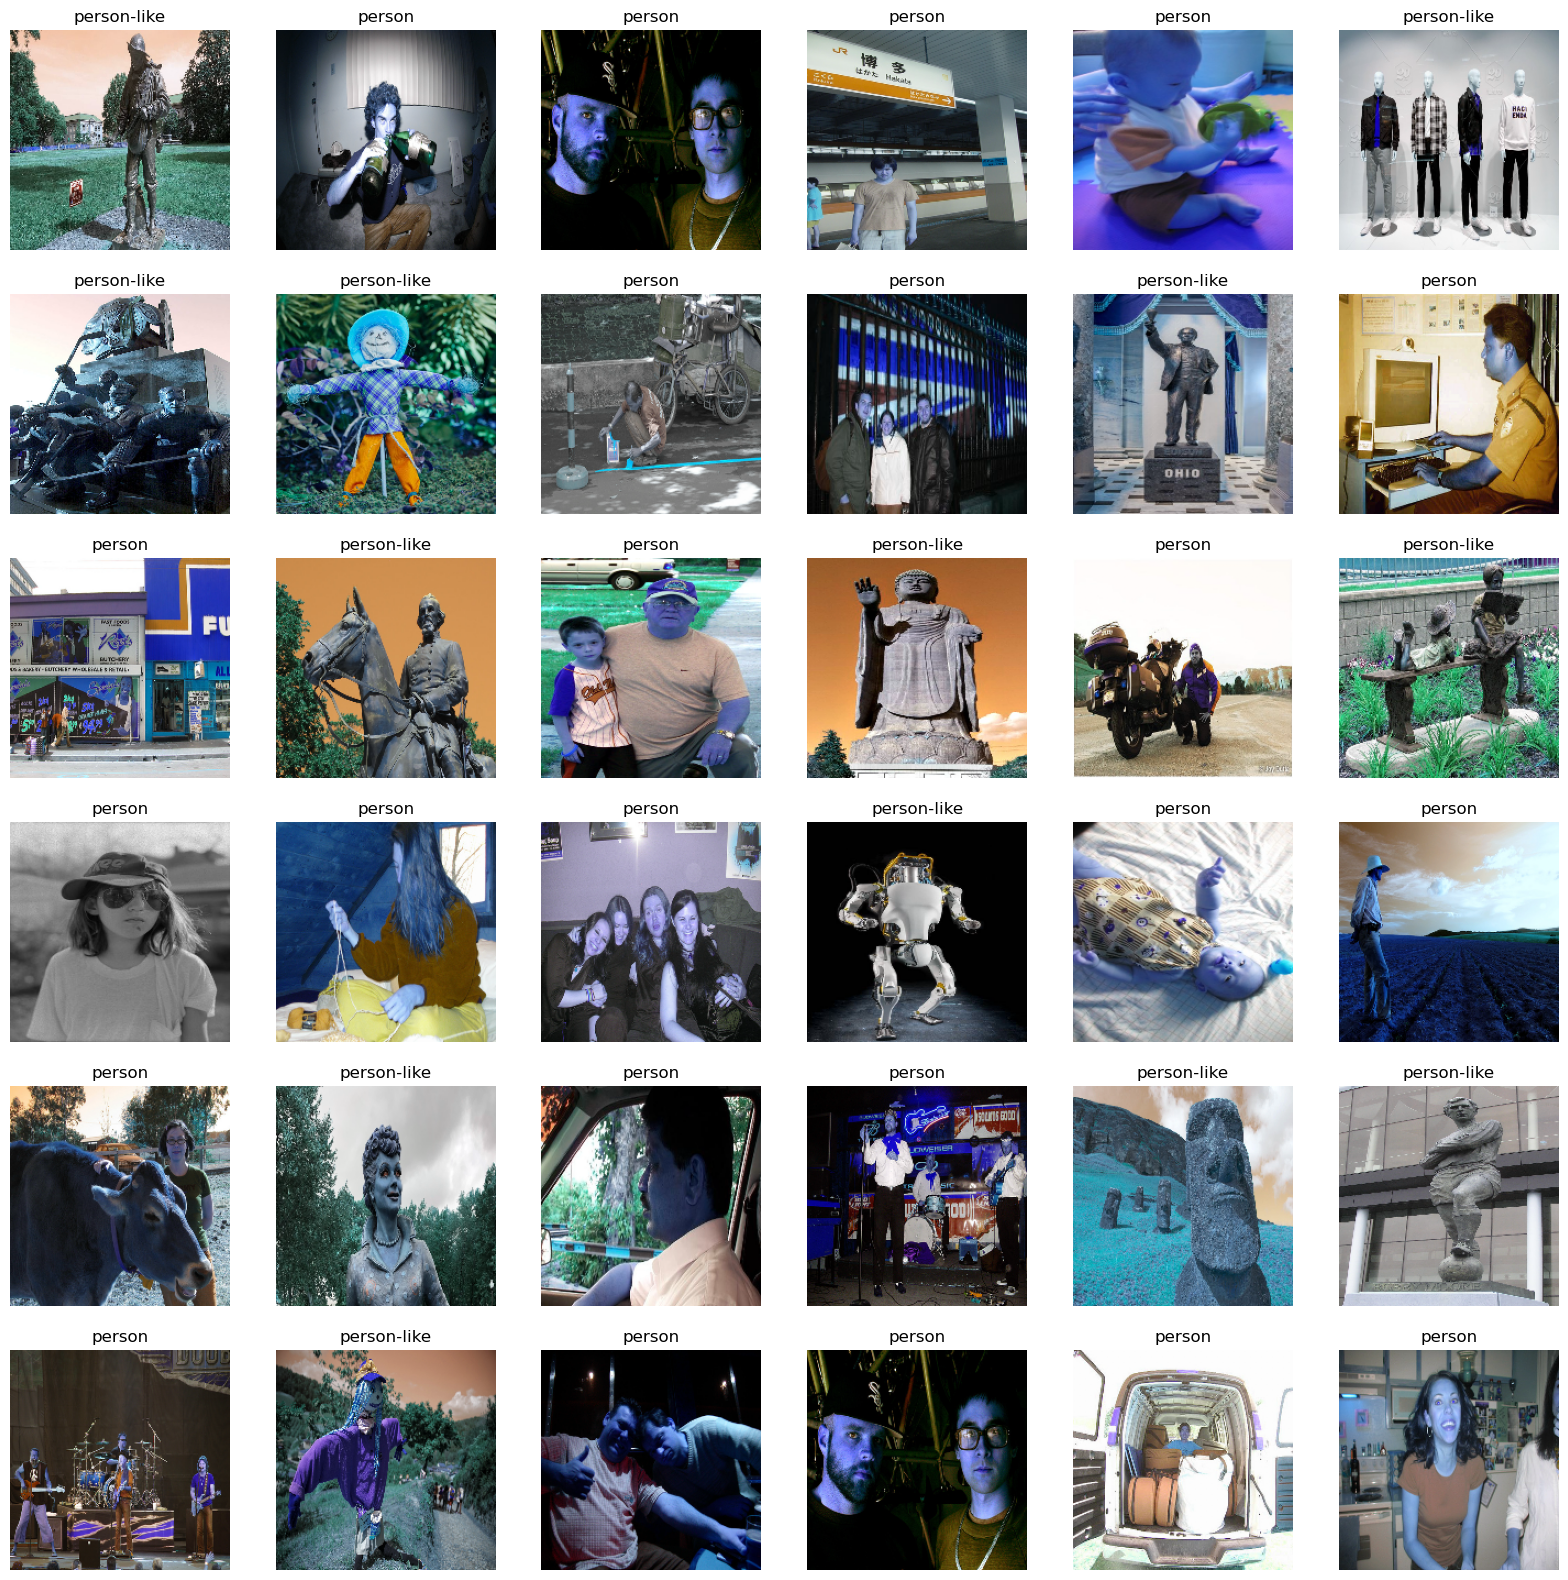

In [53]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(train_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])  
    plt.title(class_names[train_labels[i]])
    plt.axis('off')


In [54]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))


C:\Users\PRIYANKA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 135424)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      17,334,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,358,242 (66.22 MB)

 Trainable params: 17,358,242 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.5502 - loss: 1.3491 - val_accuracy: 0.5915 - val_loss: 0.6527
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.6593 - loss: 0.6042 - val_accuracy: 0.6681 - val_loss: 0.6056
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.8019 - loss: 0.4315 - val_accuracy: 0.6766 - val_loss: 0.5800
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.8887 - loss: 0.2819 - val_accuracy: 0.6596 - val_loss: 0.7357
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.9469 - loss: 0.1831 - val_accuracy: 0.6596 - val_loss: 0.7457
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.9903 - loss: 0.0691 - val_accuracy: 0.6553 - val_loss: 1.2863
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.9928 - loss: 0.0508 - val_accuracy: 0.6553 - val_loss: 0.8745
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.9992 - loss: 0.0227 - val_accuracy: 0.

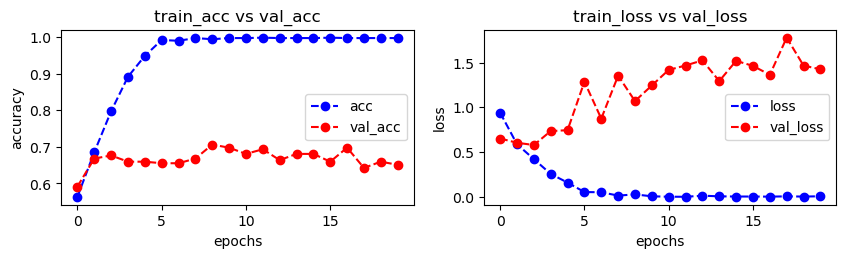

In [68]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
    
plot_accuracy_loss(history)

In [ ]:
preds = model.predict(val_images) 
print(preds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[ 5.73806477e+00 -5.33444357e+00]
 [ 1.22426367e+00 -2.30588555e+00]
 [ 3.50069189e+00 -3.77848291e+00]
 [-5.82846451e+00  3.63866615e+00]
 [-2.12414718e+00  4.11657393e-01]
 [-1.20421219e+00  3.20877343e-01]
 [-2.04854131e+00  1.84689271e+00]
 [ 2.28447914e+00 -2.37434316e+00]
 [-2.83727455e+00  2.05887151e+00]
 [ 7.39241362e-01 -1.54275405e+00]
 [-5.25144482e+00  3.46012354e+00]
 [-8.15478420e+00  5.54490852e+00]
 [ 7.84659004e+00 -8.18073750e+00]
 [-1.20986402e+00  2.94147283e-01]
 [-3.04617047e-01 -2.08148479e-01]
 [-4.12859488e+00  2.63600564e+00]
 [-8.22977602e-01  7.14332581e-01]
 [-2.77234006e+00  2.10525322e+00]
 [-4.28500623e-02 -9.26073790e-01]
 [ 1.31607246e+00 -2.52295876e+00]
 [-2.48832846e+00  8.46070945e-01]
 [-7.18840957e-01  1.23578854e-01]
 [ 1.43315041e+00 -1.46276546e+00]
 [ 9.24287796e+00 -8.88458729e+00]
 [ 4.22380596e-01 -1.89349556e+00]
 [-1.58739018e+00  8.95322084e-01]
 [ 8.36733758e-01 -1.91891968e+00]
 [ 5.14345229e-01

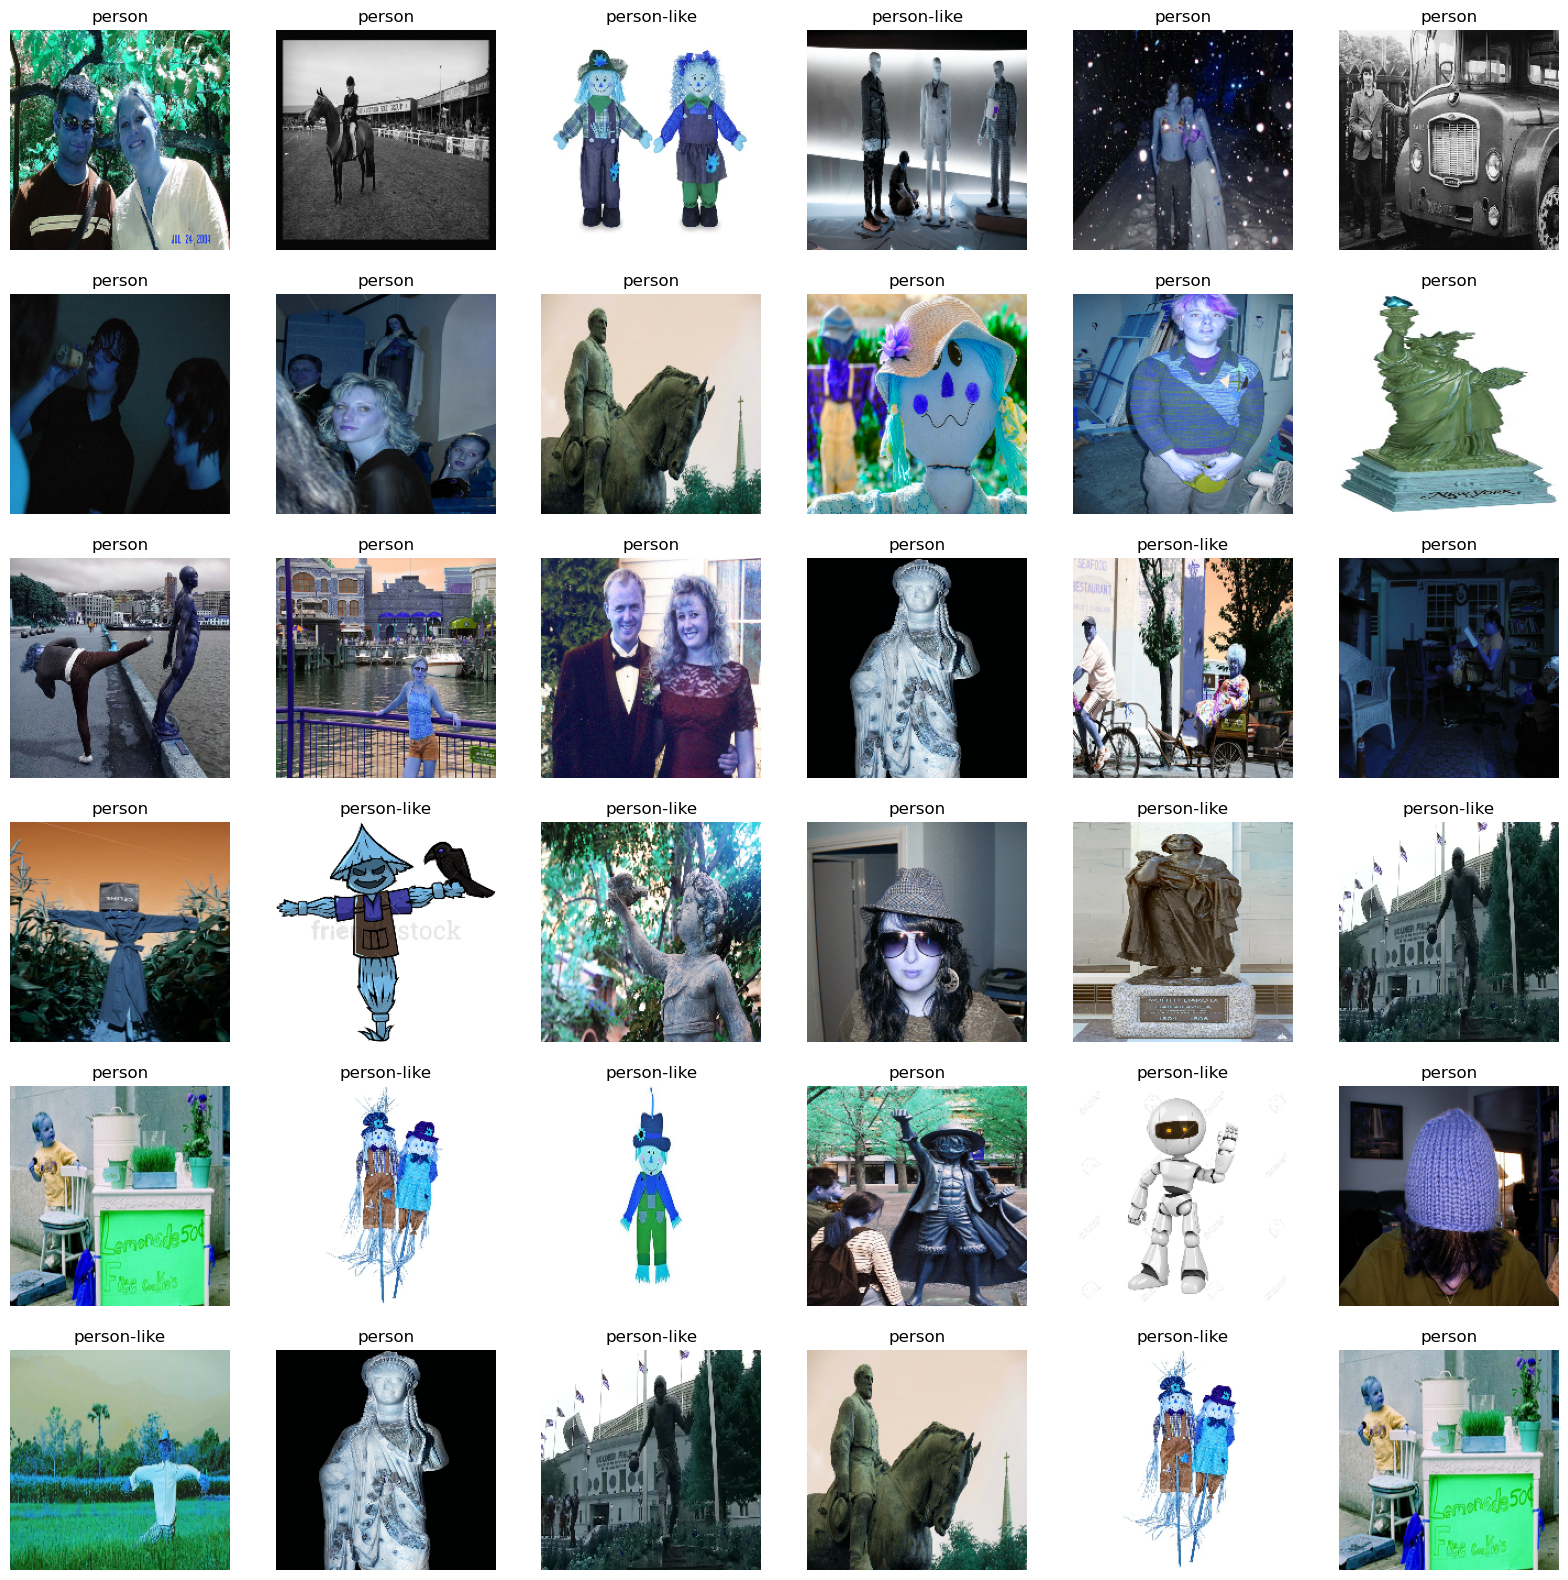

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(val_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])    
    plt.axis('off')
    x =np.argmax(preds[i])
    plt.title((class_names[x]))

In [70]:
result = []
for i in range(len(preds)):
    result.append(np.argmax(preds[i]))

In [71]:
tn, fp, fn, tp = confusion_matrix(val_labels,result).ravel()
(tn, fp, fn, tp)

(75, 10, 31, 44)

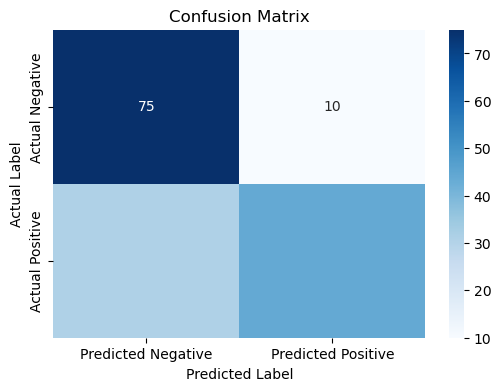

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = np.array([[tn, fp],
                        [fn, tp]])

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [73]:

import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import subprocess
from tqdm import tqdm
import supervision as sv
import tkinter as tk
from tkinter import filedialog, simpledialog, messagebox

In [74]:


 from IPython.display import Video, display
 %matplotlib inline

In [ ]:


def resize_frame(frame, scale_percent):
    """Function to resize an image in a percent scale"""
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)

    resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    return resized

def filter_tracks(centers, patience):
    """Function to filter track history"""
    filter_dict = {}
    for k, i in centers.items():
        d_frames = i.items()
        filter_dict[k] = dict(list(d_frames)[-patience:])
    return filter_dict

def update_tracking(centers_old,obj_center, thr_centers, lastKey, frame, frame_max):
    """Function to update track of objects"""
    is_new = 0
    lastpos = [(k, list(center.keys())[-1], list(center.values())[-1]) for k, center in centers_old.items()]
    lastpos = [(i[0], i[2]) for i in lastpos if abs(i[1] - frame) <= frame_max]
    previous_pos = [(k,obj_center) for k,centers in lastpos if (np.linalg.norm(np.array(centers) - np.array(obj_center)) < thr_centers)]
    if previous_pos:
        id_obj = previous_pos[0][0]
        centers_old[id_obj][frame] = obj_center
    else:
        if lastKey:
            last = lastKey.split('D')[1]
            id_obj = 'ID' + str(int(last)+1)
        else:
            id_obj = 'ID0'
        is_new = 1
        centers_old[id_obj] = {frame:obj_center}
        lastKey = list(centers_old.keys())[-1]
    return centers_old, id_obj, is_new, lastKey


def extract_roi_from_video(video_path, regions):
    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            points.append((x, y))
            cv2.circle(img, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow(region_name, img)

    num_rois = len(regions)
    ROIs = []
    print(f'Extracting ROIs from {video_path} with {num_rois} regions of interest')
    for i in range(num_rois):
        region_name = regions[i]
        video_info = sv.VideoInfo.from_video_path(video_path)
        generator = sv.get_video_frames_generator(video_path)
        iterator = iter(generator)
        frame = next(iterator)

        img = frame
        cv2.namedWindow(region_name)
        cv2.setMouseCallback(region_name, mouse_callback)

        points = []

        while True:
            cv2.imshow(region_name, img)
            key = cv2.waitKey(1)  
            if key == 27 or len(points) == 4:  
                break

        if len(points) == 4:
            cv2.line(img, points[0], points[1], (0, 0, 255), 2)
            cv2.line(img, points[1], points[2], (0, 0, 255), 2)
            cv2.line(img, points[2], points[3], (0, 0, 255), 2)
            cv2.line(img, points[3], points[0], (0, 0, 255), 2)
            cv2.imshow(region_name, img)
            cv2.waitKey(0)

        cv2.destroyAllWindows()
        for i in range(2):
            cv2.waitKey(1)

        print("Selected Points:", points)

        roi_x = min(points, key=lambda x: x[0])[0]
        roi_y = min(points, key=lambda x: x[1])[1]
        roi_width = max(points, key=lambda x: x[0])[0] - roi_x
        roi_height = max(points, key=lambda x: x[1])[1] - roi_y

        roi = frame[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]

        x_range = [min(coord[0] for coord in points), max(coord[0] for coord in points)]
        y_range = [min(coord[1] for coord in points), max(coord[1] for coord in points)]

        x_range_final = [max(x_range[0], 0), min(x_range[1], video_info.width - 1)]
        y_range_final = [max(y_range[0], 0), min(y_range[1], video_info.height - 1)]

        rectangle_range = [x_range_final, y_range_final]

        region = {"name": region_name,
                  "polygon": points,
                  "range": rectangle_range
                  }
        ROIs.append(region)

    return ROIs


def detect_pedestrains(video_path, target_dir, regions):
    verbose = False
    scale_percent = 100
    conf_level = 0.25
    thr_centers = 30
    frame_max = 10
    patience = 100
    alpha = 0.3

    video = cv2.VideoCapture(video_path)
    class_IDS = [0]
    centers_old = {}

    obj_id = 0
    end = []
    frames_list = []
    count_p = 0
    lastKey = ''
    print(f'[INFO] - Verbose during Prediction: {verbose}')

    # Original information of video
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video.get(cv2.CAP_PROP_FPS)
    print('[INFO] - Original Dim: ', (width, height, fps))

    # Scaling Video for better performance
    print(scale_percent)
    if scale_percent != 100:
        print('[INFO] - Scaling change may cause errors in pixels lines ')
        width = int(width * scale_percent / 100)
        height = int(height * scale_percent / 100)
        print('[INFO] - Dim Scaled: ', (width, height))
    print(scale_percent)

    if '/' in video_path:
        video_name = video_path.split("/")[-1].split(".")[0]
    else:
        video_name = video_path.split(".")[0]

    result_video_name = video_name + ".mp4"
    annotated_video = result_directory + "/Annotated_" + result_video_name
    VIDEO_CODEC = "MP4V"

    output_video = cv2.VideoWriter(annotated_video,
                                   cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                                   fps, (width, height))
    model = YOLO('yolov8x.pt')
    dict_classes = model.model.names
    rois = extract_roi_from_video(video_path=video_path, regions=regions)
    roi_counts = {roi['name']: 0 for roi in rois}
    count_p_roi = 0
    for i in tqdm(range(int(video.get(cv2.CAP_PROP_FRAME_COUNT)))):  

        isFrame, frame = video.read()

        if not isFrame:
            break

        for roi in rois:  

            area_roi = [np.array(roi['polygon'], dtype=np.int32)]

            x_range, y_range = roi['range']
            ROI = frame[y_range[0]:y_range[1], x_range[0]:x_range[1]]

            if verbose:
                print('Dimension Scaled(frame): ', (frame.shape[1], frame.shape[0]))

            y_hat = model.predict(ROI, conf=conf_level, classes=class_IDS, device='cpu', verbose=False)

            boxes = y_hat[0].boxes.xyxy.cpu().numpy()
            conf = y_hat[0].boxes.conf.cpu().numpy()
            classes = y_hat[0].boxes.cls.cpu().numpy()

            positions_frame = pd.DataFrame(np.concatenate([boxes, conf.reshape(-1, 1), classes.reshape(-1, 1)], axis=1),
                                           columns=['xmin', 'ymin', 'xmax', 'ymax', 'conf', 'class'])

            labels = [dict_classes[i] for i in classes]

            for ix, row in enumerate(positions_frame.iterrows()):
                xmin, ymin, xmax, ymax, confidence, category, = row[1].astype('int')
                center_x, center_y = int(((xmax + xmin)) / 2), int((ymax + ymin) / 2)

                centers_old, id_obj, is_new, lastKey = update_tracking(centers_old, (center_x, center_y), thr_centers,
                                                                       lastKey,
                                                                       i, frame_max)
                roi_counts[roi['name']] += is_new

                cv2.rectangle(ROI, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)
                for center_x, center_y in centers_old[id_obj].values():
                    cv2.circle(ROI, (center_x, center_y), 5, (0, 0, 255), -1)

                cv2.putText(img=ROI, text=id_obj + ':' + str(np.round(conf[ix], 2)),
                            org=(xmin, ymin - 10), fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=0.8, color=(0, 0, 255),
                            thickness=1)

            y_coordinate = 40
            for region, person_count in roi_counts.items():
                cv2.putText(img=frame, text=f'Counts People in ROI {region}:{person_count}',
                            org=(30, y_coordinate), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                            fontScale=1, color=(255, 0, 0), thickness=1)
                y_coordinate += 50

            centers_old = filter_tracks(centers_old, patience)

            overlay = frame.copy()
            cv2.polylines(overlay, pts=area_roi, isClosed=True, color=(255, 0, 0), thickness=2)
            cv2.fillPoly(overlay, area_roi, (255, 0, 0))
            frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

            frames_list.append(frame)
            output_video.write(frame)

    output_video.release()

    for region, person_count in roi_counts.items():
        print(f"Number of persons moving {region} is {person_count}")
    print(f"Annotated video saved at {annotated_video}")
    return roi_counts

def browse_video_path():
    file_path = filedialog.askopenfilename(title="Select Video File")
    entry_video_path.delete(0, tk.END)
    entry_video_path.insert(0, file_path)


def browse_target_dir():
    dir_path = filedialog.askdirectory(title="Select Target Directory")
    entry_target_dir.delete(0, tk.END)
    entry_target_dir.insert(0, dir_path)


def clear_values():
    entry_video_path.delete(0, tk.END)
    entry_target_dir.delete(0, tk.END)
    entry_num_regions.delete(0, tk.END)
    entry_region_names.delete(0, tk.END)
    result_text.config(state=tk.NORMAL)
    result_text.delete(1.0, tk.END)  
    result_text.config(state=tk.DISABLED)


def start_detection():
    video_path = entry_video_path.get()
    target_dir = entry_target_dir.get()
    region_names = entry_region_names.get()

    num_regions = entry_num_regions.get()
    if not video_path or not target_dir or not region_names or not num_regions.isdigit():
        messagebox.showerror("Error", "Please provide valid inputs.")
        return
    else:
        num_regions = int(num_regions)
        regions.extend(region_names.split(","))
        if num_regions != len(regions):
            messagebox.showerror("Error", "Number of regions entered does not match the specified number.")
            return
        else:
            try:
                result_text.config(state=tk.NORMAL)
                result_text.delete(1.0, tk.END)  
                result_text.insert(tk.END, "Detection in progress...\n")
                result_text.config(state=tk.DISABLED)

                final_result = detect_pedestrains(video_path, target_dir, regions)

                result_text.config(state=tk.NORMAL)
                result_text.insert(tk.END, "Detection completed. \nResults:\n")
                for region, count in final_result.items():
                    result_text.insert(tk.END, f"Number of Pedestrains moving {region}: {count}\n")
                result_text.config(state=tk.DISABLED)

            except Exception as e:
                messagebox.showerror("Error", f"An error occurred during detection: {str(e)}")


if __name__ == "__main__":
    root = tk.Tk()
    root.title("Pedestrian Detection App")

    label_video_path = tk.Label(root, text="Video Path:")
    label_video_path.grid(row=0, column=0, padx=10, pady=10, sticky=tk.E)

    entry_video_path = tk.Entry(root, width=50)
    entry_video_path.grid(row=0, column=1, padx=10, pady=10, columnspan=2)

    button_browse_video = tk.Button(root, text="Browse", command=browse_video_path)
    button_browse_video.grid(row=0, column=3, padx=10, pady=10)

    label_target_dir = tk.Label(root, text="Target Directory:")
    label_target_dir.grid(row=1, column=0, padx=10, pady=10, sticky=tk.E)

    entry_target_dir = tk.Entry(root, width=50)
    entry_target_dir.grid(row=1, column=1, padx=10, pady=10, columnspan=2)

    button_browse_target = tk.Button(root, text="Browse", command=browse_target_dir)
    button_browse_target.grid(row=1, column=3, padx=10, pady=10)

    label_num_regions = tk.Label(root, text="Number of Regions:")
    label_num_regions.grid(row=2, column=0, padx=10, pady=10, sticky=tk.E)

    entry_num_regions = tk.Entry(root, width=50)
    entry_num_regions.grid(row=2, column=1, padx=10, pady=10)

    label_region_names = tk.Label(root, text="Region Names (comma-separated):")
    label_region_names.grid(row=3, column=0, padx=10, pady=10, sticky=tk.E)

    entry_region_names = tk.Entry(root, width=50)
    entry_region_names.grid(row=3, column=1, padx=10, pady=10, columnspan=2)

    button_start_detection = tk.Button(root, text="Start Detection", command=start_detection)
    button_start_detection.grid(row=5, column=0, columnspan=4, pady=10)

    regions = []

    result_text = tk.Text(root, height=10, width=60, state=tk.DISABLED, relief="groove",
                          wrap=tk.WORD)
    result_text.grid(row=6, column=0, columnspan=4, pady=10)

    root.mainloop()
